# Assignment 4

In this assignment, you'll combine the assignment 3 data set with nutrition data from the [USDA Food Composition Databases](https://ndb.nal.usda.gov/ndb/search/list). The CSV file `fresh.csv` contains the fresh fruits and vegetables data you extracted in assignment 3.

The USDA Food Composition Databases have a [documented](https://ndb.nal.usda.gov/ndb/doc/index) web API that returns data in JSON format . You need a key in order to use the API. Only 1000 requests are allowed per hour, so it would be a good idea to use [caching][requests_cache].

[Sign up for an API key here](https://api.data.gov/signup/). The key will work with any Data.gov API. You may need the key again later in the quarter, so make sure you save it.

These modules may be useful:

* [requests](http://docs.python-requests.org/en/master/user/quickstart/)
* [requests_cache][]
* [urlparse](https://docs.python.org/2/library/urlparse.html)
* [pandas](http://pandas.pydata.org/pandas-docs/stable/)

[requests_cache]: https://pypi.python.org/pypi/requests-cache

In [7]:
import pandas as pd
import json
from matplotlib import pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
import requests
import requests_cache
# Set up a cache for requests.
requests_cache.install_cache("cache")

__Exercise 1.1.__ Read the [search request documentation](https://ndb.nal.usda.gov/ndb/doc/apilist/API-SEARCH.md), then write a function called `ndb_search()` that makes a search request. The function should accept the search term as an argument. The function should return the search result items as a list (for 0 items, return an empty list).

Note that the search url is: `https://api.nal.usda.gov/ndb/search`

As an example, a search for `"quail eggs"` should return this list:

```python
[{u'ds': u'BL',
  u'group': u'Branded Food Products Database',
  u'name': u'CHAOKOH, QUAIL EGG IN BRINE, UPC: 044738074186',
  u'ndbno': u'45094707',
  u'offset': 0},
 {u'ds': u'BL',
  u'group': u'Branded Food Products Database',
  u'name': u'L&W, QUAIL EGGS, UPC: 024072000256',
  u'ndbno': u'45094890',
  u'offset': 1},
 {u'ds': u'BL',
  u'group': u'Branded Food Products Database',
  u'name': u'BUDDHA, QUAIL EGGS IN BRINE, UPC: 761934535098',
  u'ndbno': u'45099560',
  u'offset': 2},
 {u'ds': u'BL',
  u'group': u'Branded Food Products Database',
  u'name': u'GRAN SABANA, QUAIL EGGS, UPC: 819140010103',
  u'ndbno': u'45169279',
  u'offset': 3},
 {u'ds': u'BL',
  u'group': u'Branded Food Products Database',
  u'name': u"D'ARTAGNAN, QUAIL EGGS, UPC: 736622102630",
  u'ndbno': u'45178254',
  u'offset': 4},
 {u'ds': u'SR',
  u'group': u'Dairy and Egg Products',
  u'name': u'Egg, quail, whole, fresh, raw',
  u'ndbno': u'01140',
  u'offset': 5}]
```

As usual, make sure you document and test your function.

In [8]:

def ndb_search(term):
    """
    accept the search term as an argument and
    return the search result items as a list (for 0 items, return an empty list)
    """
    #set parameters max,offset, and sort
    maximum = 25
    offset = 0
    sort = 'r' #n is newest r is relevant
    url = 'https://api.nal.usda.gov/ndb/search'
    key = "hy0BrC1ewads9OAj3kUoTF3o5fXEheRAczYGEJvl"
    response = requests.get(url, params = {
        "q": term,
        "format": "json",
        "sort": sort,
        "max": maximum,
        "offset": offset,
        "api_key": key,
        "ds": "Standard Reference",    #adding this parameter makes output have unbranded food. 
    })

    response.raise_for_status() # check for errors
    try:
        list_out = response.json()["list"]["item"]
    except KeyError:
        list_out=[]
    return(list_out)
    
ndb_search("blackberries raw") 

[{u'ds': u'SR',
  u'group': u'Fruits and Fruit Juices',
  u'name': u'Blackberries, raw',
  u'ndbno': u'09042',
  u'offset': 0},
 {u'ds': u'SR',
  u'group': u'American Indian/Alaska Native Foods',
  u'name': u'Blackberries, wild, raw (Alaska Native)',
  u'ndbno': u'35015',
  u'offset': 1}]

__Exercise 1.2.__ Use your search function to get NDB numbers for the foods in the `fresh.csv` file. It's okay if you don't get an NDB number for every food, but try to come up with a strategy that gets most of them. Discuss your strategy in a short paragraph.

Hints:

* The foods are all raw and unbranded.
* You can test search terms with the [online search page](https://ndb.nal.usda.gov/ndb/search/list).
* You can convert the output of `ndb_search()` to a data frame with `pd.DataFrame()`.
* The string methods for [Python](https://docs.python.org/2/library/stdtypes.html#string-methods) and [Pandas](http://pandas.pydata.org/pandas-docs/stable/text.html#method-summary) are useful here. It's okay if you use _simple_ regular expressions in the Pandas methods, although this exercise can be solved without them.
* You can merge data frames that have a column in common with `pd.merge()`.

In order to extract the correct values, one of the things I did was add a parameter to my ndb_search function called ds and set it to "Standard Reference" because that has unbranded food. Also, when looking at my ndb search function I see that foods with "raw" in the name and either "Fruits and Fruit Juices" or "Vegetables and Vegetable Products" in groups  are more the results that I want. So, I added "raw" to the names of foods and added conditional statements in my function that only looked up the numbers of foods in fruits and vegetables groups as specified earlier. 

In [9]:
import os
import glob
import sys
import re

doc_root = os.path.join(os.environ['HOME'],'Downloads/fresh.csv')
fresh = pd.read_csv(doc_root)
food = list(fresh["food"] +' raw') #this adds raw to the name of each fruit which helps with search

#need to remove underscores from food names so search works better
for i in range(len(food)):
    food[i] = re.sub("_"," ", food[i])

food[12] = "kiwifruit raw" # kiwi is called "kiwifruit" not kiwi so I have to change it 
print food
print len(food)


['watermelon raw', 'cantaloupe raw', 'tangerines raw', 'strawberries raw', 'plums raw', 'oranges raw', 'raspberries raw', 'pomegranate raw', 'pineapple raw', 'apricots raw', 'honeydew raw', 'papaya raw', 'kiwifruit raw', 'cherries raw', 'bananas raw', 'apples raw', 'peaches raw', 'nectarines raw', 'pears raw', 'grapefruit raw', 'blackberries raw', 'grapes raw', 'blueberries raw', 'mangoes raw', 'asparagus raw', 'cucumbers raw', 'cucumbers raw', 'lettuce iceberg raw', 'onions raw', 'turnip greens raw', 'mustard greens raw', 'potatoes raw', 'collard greens raw', 'green beans raw', 'acorn squash raw', 'red peppers raw', 'cabbage raw', 'cabbage raw', 'sweet potatoes raw', 'summer squash raw', 'radish raw', 'butternut squash raw', 'avocados raw', 'kale raw', 'artichoke raw', 'okra raw', 'green peppers raw', 'brussels sprouts raw', 'corn sweet raw']
49


In [14]:
def ndb_nums(food_params):
    return_dict = {}
    for i in range(len(food_params)):
        lst =  ndb_search(food_params[i]) #this returns list of dictionaries 
        if len(lst) > 0:
            dct = lst[0] #get the first element of the list -- because we sorted by relevance
            if "Fruits and Fruit Juices" in dct.get('group') or "Vegetables and Vegetable Products" in dct.get('group'):
                return_dict[food_params[i]] = dct.get('ndbno')
    return return_dict
ndb_nums(food) #because I changed kiwi to kiwifruit... this is able to work for all of them

vals = ndb_nums(food)
#since I changed the names of the food column to include raw... I want it to be the same in the data frame
fresh["food"] = food        

#this turns the numbers into a column and adds it to fresh
ndbno = []
for i in range(len(food)):
    ndbno.append(vals.get(food[i]))
ndbno_se = pd.Series(ndbno)
fresh['ndbno'] = ndbno_se.values
#pd.to_numeric(fresh['ndbno'], errors='coerce')

#fresh['ndbno']
fresh.head()

,form,price_per_lb,yield,lb_per_cup,price_per_cup,food,type,ndbno
0,Fresh1,0.333412,0.52,0.330693,0.212033,watermelon raw,fruit,09326
1,Fresh1,0.535874,0.51,0.374786,0.393800,cantaloupe raw,fruit,09181
2,Fresh1,1.377962,0.74,0.407855,0.759471,tangerines raw,fruit,09221
3,Fresh1,2.358808,0.94,0.319670,0.802171,strawberries raw,fruit,09316
4,Fresh1,1.827416,0.94,0.363763,0.707176,plums raw,fruit,09279


__Exercise 1.3.__ Read the [food reports V2 documentation](https://ndb.nal.usda.gov/ndb/doc/apilist/API-FOOD-REPORTV2.md), then write a function called `ndb_report()` that requests a _basic_ food report. The function should accept the NDB number as an argument and return the list of nutrients for the food.

Note that the report url is: `https://api.nal.usda.gov/ndb/V2/reports`

For example, for `"09279"` (raw plums) the first element of the returned list should be:

```python
{u'group': u'Proximates',
 u'measures': [{u'eqv': 165.0,
   u'eunit': u'g',
   u'label': u'cup, sliced',
   u'qty': 1.0,
   u'value': u'143.93'},
  {u'eqv': 66.0,
   u'eunit': u'g',
   u'label': u'fruit (2-1/8" dia)',
   u'qty': 1.0,
   u'value': u'57.57'},
  {u'eqv': 151.0,
   u'eunit': u'g',
   u'label': u'NLEA serving',
   u'qty': 1.0,
   u'value': u'131.72'}],
 u'name': u'Water',
 u'nutrient_id': u'255',
 u'unit': u'g',
 u'value': u'87.23'}
```

Be sure to document and test your function.

In [10]:
def ndb_report(ndb_num):
    """
    requests a basic food report. The function accepts the NDB number as an argument and 
    returns the list of nutrients for the food.
    """
    url_type = 'b'
    key = "hy0BrC1ewads9OAj3kUoTF3o5fXEheRAczYGEJvl"
    url = "https://api.nal.usda.gov/ndb/V2/reports"
    response = requests.get(url, params = {
        "ndbno": ndb_num,
        "format": "json",
        "type": url_type,
        "api_key": key
        
    })        
    response.raise_for_status() # check for errors
    try:
        list_out = response.json()["foods"][0]["food"]["nutrients"] #indeces there to extract the first result in foods and within that I want info corresponding to nutrients
    except KeyError:
        list_out=[]
    return(list_out)
    
ndb_report("09279")[0] #0 element gives water, 1 element gives energy(kilocals), 2 protein, 5 fiber... etc

{u'group': u'Proximates',
 u'measures': [{u'eqv': 165.0,
   u'eunit': u'g',
   u'label': u'cup, sliced',
   u'qty': 1.0,
   u'value': u'143.93'},
  {u'eqv': 66.0,
   u'eunit': u'g',
   u'label': u'fruit (2-1/8" dia)',
   u'qty': 1.0,
   u'value': u'57.57'},
  {u'eqv': 151.0,
   u'eunit': u'g',
   u'label': u'NLEA serving',
   u'qty': 1.0,
   u'value': u'131.72'}],
 u'name': u'Water',
 u'nutrient_id': u'255',
 u'unit': u'g',
 u'value': u'87.23'}

In [16]:
#adding kilocals and protein columns to dataframe in order to be able to look at those columns in plots later
kilocals =[]
    
for x in range(len(fresh['ndbno'])):
    values = float(ndb_report(fresh['ndbno'][x])[1]["value"])
    kilocals.append(values)

kilocals_se = pd.Series(kilocals)
fresh['kilocals'] = kilocals_se.values

#need kilocalories per pound for best value column... use conversion rate:
fresh['kilocals per pound'] = fresh['kilocals']*(4.5359237)

protein = []

for x in range(len(fresh['ndbno'])):
    values = float(ndb_report(fresh['ndbno'][x])[2]["value"])
    protein.append(values)
    
protein_se = pd.Series(protein)
fresh['protein'] = protein_se.values

fresh.head()
#fresh['kilocals per pound']

,form,price_per_lb,yield,lb_per_cup,price_per_cup,food,type,ndbno,kilocals,kilocals per pound,protein
0,Fresh1,0.333412,0.52,0.330693,0.212033,watermelon raw,fruit,09326,30.0,136.077711,0.61
1,Fresh1,0.535874,0.51,0.374786,0.393800,cantaloupe raw,fruit,09181,34.0,154.221406,0.84
2,Fresh1,1.377962,0.74,0.407855,0.759471,tangerines raw,fruit,09221,43.0,195.044719,0.50
3,Fresh1,2.358808,0.94,0.319670,0.802171,strawberries raw,fruit,09316,32.0,145.149558,0.67
4,Fresh1,1.827416,0.94,0.363763,0.707176,plums raw,fruit,09279,46.0,208.652490,0.70


__Exercise 1.4.__ Which foods provide the best combination of price, yield, and nutrition? You can use kilocalories as a measure of "nutrition" here, but more a detailed analysis is better. Use plots to support your analysis.

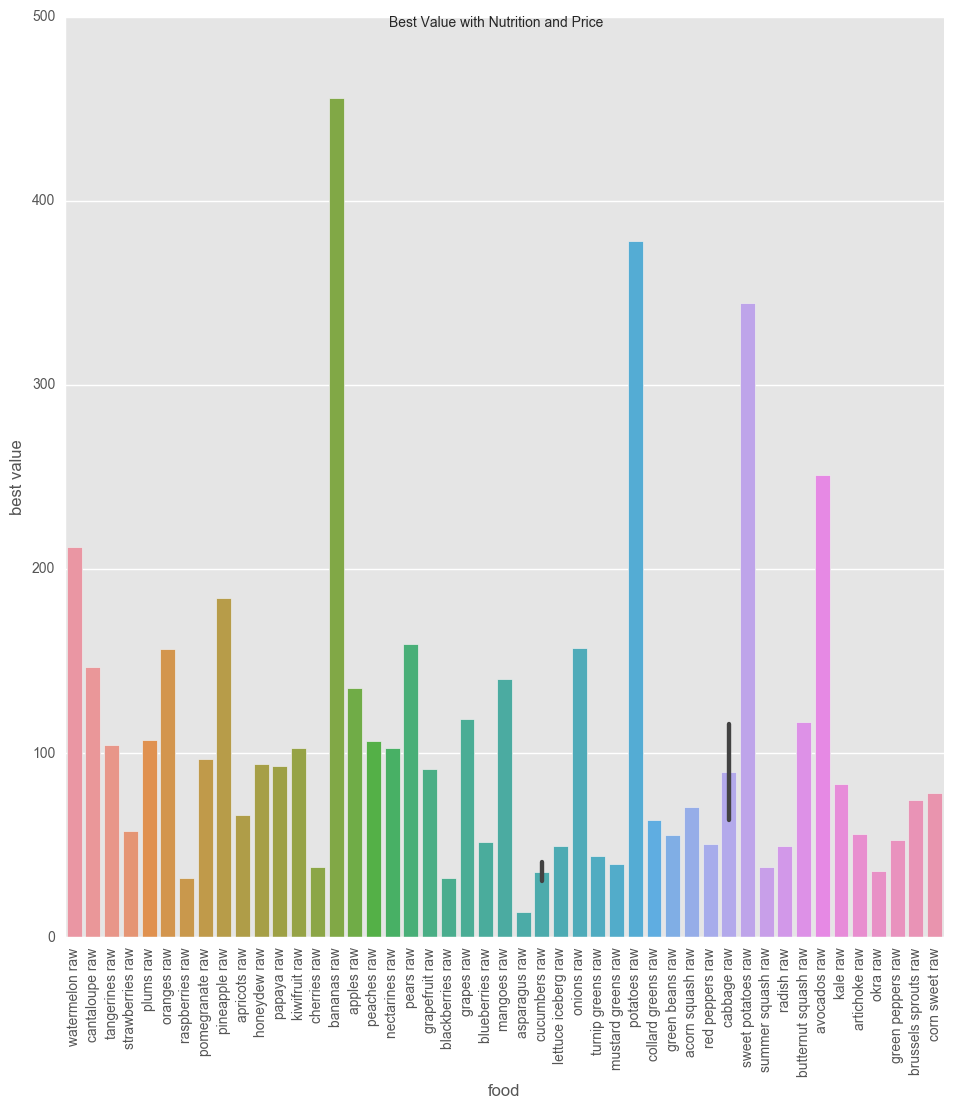

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
#to get Best value: 
# create new column (kilocals per pound/price per pound)/ yield ... for every dollar how many kilocalories u get
fresh['best value'] = (fresh['kilocals per pound']/fresh['price_per_lb'])*fresh['yield']
#fresh.head()

valplot=sns.factorplot("food", 'best value', data = fresh, kind = "bar", size=10) #Barplot
valplot.set_xticklabels(rotation=90) #Rotate axis labels for readability
valplot.fig.suptitle('Best Value with Nutrition and Price')
plt.show(valplot)

From the above plot, we can see that bananas, potatoes, sweet potatoes, and avocados have the best value out of all the other foods. They have the best value with respect to price, nutrition, and yield. 

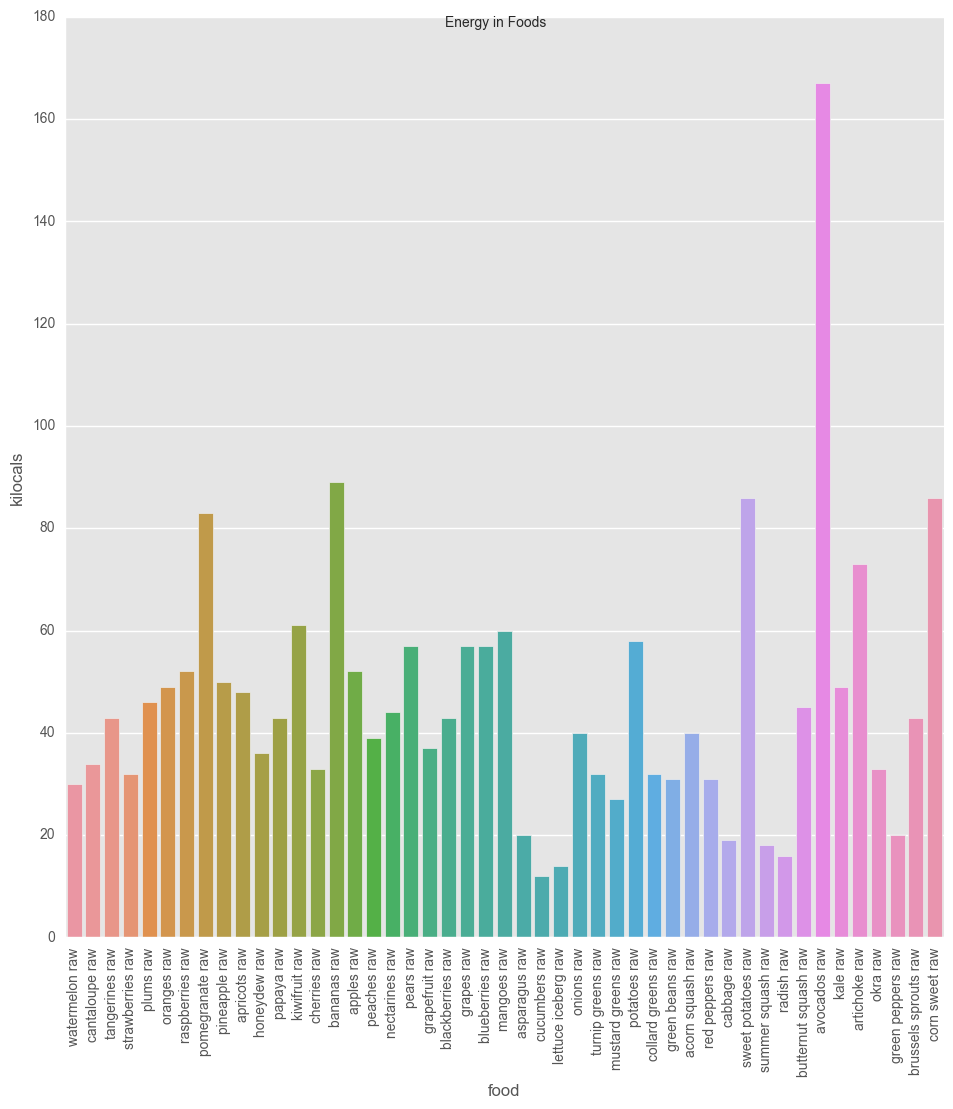

In [18]:
#Energy in foods barplot (denoted in kilocals)
calplot=sns.factorplot("food", "kilocals", data = fresh, kind = "bar", size=10) #Barplot
calplot.set_xticklabels(rotation=90) #Rotate axis labels for readability
calplot.fig.suptitle('Energy in Foods')
plt.show(calplot)

from the plot above we see that avocados have the most kilocalories, i.e. give the most energy and we also know from the previous plots that they also have good value. 

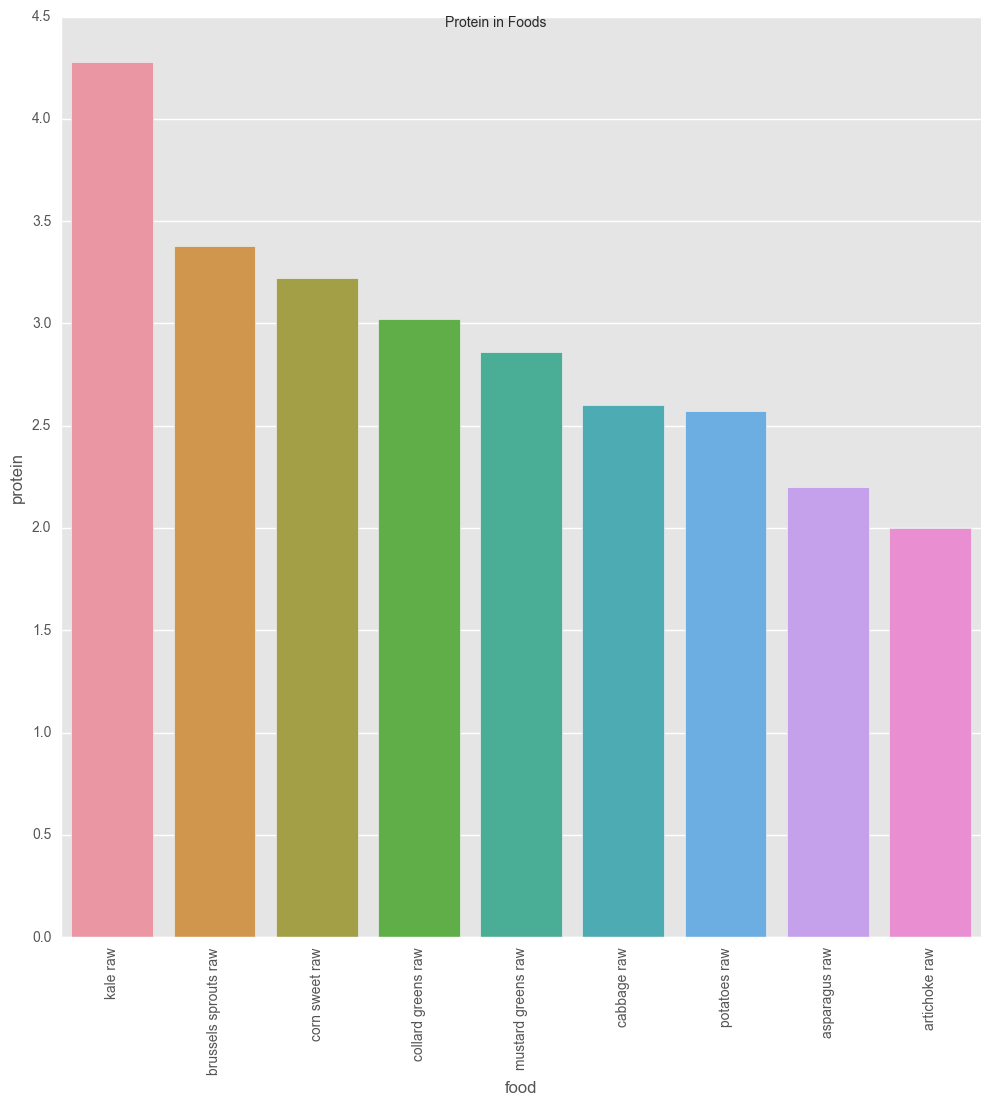

In [19]:
#Protein in foods barplot
fresh = fresh.sort_values(by = "protein", axis=0, ascending=False, inplace=False, kind='quicksort', na_position='last') 
pro=fresh[:10:] #Only first ten rows
proplot=sns.factorplot("food", "protein", data = pro, kind = "bar", size=10) 
proplot.set_xticklabels(rotation=90) #Rotate axis labels for readability
proplot.fig.suptitle('Protein in Foods')
plt.show(proplot)

Kale and brussel sprouts have the most protein content of all other foods. I want to see if it's hard to get a good amount of protein for a low price. 

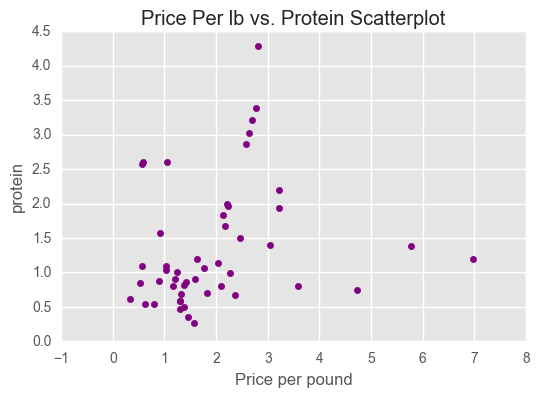

In [21]:
#price vs. protein scatterplot 
plt.scatter("price_per_lb","protein", color = "purple",data = fresh)
plt.title('Price Per lb vs. Protein Scatterplot')
plt.xlabel('Price per pound')
plt.ylabel('protein')
plt.show()

From the above plot we can see that the most expensive food are not necessarily those with the largest amount of protein. In fact, you can get foods the are very high in protein for a comparitively low price. The most expensive foods, in fact, have a relatively low protein content. 